## Computational Neuroscience Assignment 7

### Authors:
* Jochem Beurskens s4637801
* Kirina van der Bijl S1061566
* Arne Diehl S4451392

In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt

## 1

Regarding neural code (the relationship between neuronal activity and events in the outside world):

- Do spike times matter or is the firing rate estimated across a sufficiently small time interval enough?
- Do correlations between neurons contain usefull information?
- What is meant by correlations and containing information?

Formulate opinion on: Do correlations play a role? How do you measure correlations?

## 1.a)
https://www.nature.com/articles/35079612/

The research: Compare information obtained about the stimuli from pairs of ganglion pairs including and excluding correlations.

Correlations mean how ganglion cells influence each other. Removing this correlation makes the cells independent of each other. Loss of information without correlations is a measure of the importance of correlations. The information was measured by dividing the stimuli movie into segments of fixed length, each segment was treated as a separate stimulus. This movie was presented several hundred times to estimate the probability of getting a certain repsonse spike train. With the conditional probabilities, the amount of information, I, was calculated using the following formula:
$$I = - \sum_{r_1,r_2}P(r_1,r_2)log_2P(r_1,r_2) + \sum_s P(s) \sum_{r_1,r_2}P(r_1,r_2|s)log_2P(r_1,r_2|s)$$

Result: Little information is lost when ignoring correlated firing of retinal ganglion cells. Independent decoder models capture more than 90% of the cells information. 

Their research shows that ganglion cells can be treated as largely independent from each other. However, this is only the case if you are satisfied with capturing 90% of the information in the ganglion activity. And they only studied light-adapted retina, their findings may not apply to dark-adapted retina. 


## 1.b) 
https://physiology.med.cornell.edu/faculty/nirenberg/lab/pel/critics/Meister_2001_Encoders.pdf

The review explains all the errors in the paper by Nirenberg. And why their clain that 'a 90% accuracy is good enough', is faulty. 

This is Meister's conclusion on Nirenberg's paper, and my interpretation of it: \\
- The first analysis:

The $\Delta I$ 'information loss' desicribed by Nirenberg does not use the difference in the amount of information that is contained in the coding scheme. The could be a difference in the amount of information in the coding scheme, but if both have a $\Delta I = 0$, they are both treated as independent encoders. This makes it impossible to detect concerted encoding when only analysing $\Delta I$, this leads to a loss of information. This loss of information is not included in the 90% accuracy as this analysis is relative to $\Delta I$, which does not take concerted encoding into account.

- The second analysis: 

The used decoder cannot recognise correlated spike trains on the milisecond scale. They use a spatially uniform stimulus so they cannot test spatial details. When these two shortcomming are adressed, like in research by Dan et al, correlations do contribute to the encoding of visual information. 


## 1.c) 
https://www.pnas.org/content/pnas/100/12/7348.full.pdf

Correlations between the spike time of neurons matter if the level of synchronious spikes amongst neurons is needed to differentiate stimuli. When another measure like spike number can be used, spike synchrony is redundant. In real life, there is no binary division between cases where synchrony matters and where it doesn't. So, correlations can be usefull in extracting the stimulus when the stimuli overlap. 

Containing information refers to the ability to extract the stimulus from the neural activity. 

The approach in this paper is to ignore correlations and test how much this affects the ability to asses what the stimulus is. 

Two types of correlation in literature: \\
1) Noise correlation. Neuronal reponses are noise-correlated iff:
$$p(r_1, r_2, ...,r_n|s) \neq \prod_{i=1}^{n} p(r_i|s) $$ 
2) Signal correlation. Neuronal reponses are signal-correlated iff:
$$p(r_1, r_2, ...,r_n) \neq \prod_{i=1}^{n} p(r_i) $$ 

In this article 'correlated' refers to noise correlated. When the input space of two measured neurons to overlap, the extra correlations besides the signal correlations are noise correlations. The function of the noise correlations is under dispute and researched in this article. 

It would be nice if correlations do not play a role. This greatly simplifies the decoding of stimuli from neual response data. 


## Kirina's opinion:

It is tempting to conclude that they do not play a role, as we can get 90% accuracy without correlations. However, if the lost 10% contains valuable information, we need correlations to decipher the correct stimulus value. Also, it seems that more information than 10% is lost, as the measuring methods used to obtain this 90% accuracy are faulty. So, I think that correlations do play a role. The measuring method used by Dan et al (https://www.nature.com/articles/nn1098_501) seems to be an accurate way.


## Arne’s opinion:

I expect that we cannot conclude from the data at hand whether or not correlations are important within the context of real neuron systems. I do think that neurons can theoretically encode information by correlation, as demonstrated by Meister & Hosoya, but it remains to be seen whether the human neural system or any neural system makes use of this.

## Jochem's opinion:

In the first paper only the information held by corralations between retinal ganglion cells is discussed. But in the introduction it is stated that neurons from the reina to the cortex tend to fire together more than would be expected by chance. The vast diversity in firing patterns/behaviour between different regions of the brain gives reason to assume that the importance of correlations might vary between these regions as well. This means that the data presented here will only support conclusions on the importance of correlations in the retinal ganglion cells. That being said, we can talk about the meaning of correlations in the retinal ganglion cells.

As is nicely presented in the first argument of the reaction by Meister et al. the measurement of $\Delta I$ can represent a distorted image of the importance of the information lost when comparing information in the single cell and multiple cell responses. Therefore the around $10\%$ information loss might have been an underestimation in the original paper. And if there is any information lost at all, it raises the question as to what is lost, and why is this information there in the first place? This suggests to me that there is an importance to the correlated firing between different neurons in the retinal ganglial region, but as stated in the clarifying paper, this might not matter much to decoding the neural code of these cells. Thus the importance depends on whether you want a full picture of the neural code, or whether you want a similarly functioning representation of the neural code.

The clarifying paper also shows that the different cost functions that are used have different benefits. I think that using cost functions like these does hold information on the importance of correlations. 

## 2.a)

Code derived from:
https://github.com/KosalaHerath/kohonen-som/blob/master/source/kohonen_examples/triangle_1d_array.m

In [ ]:
def SOM(N=100, number_of_inputs = 1000, upper_bound_xx=1, 
        lower_bound_xx=0, upper_bound_xy=1, lower_bound_xy=0, 
        upper_bound_m=0.45, lower_bound_m=0.55, T=30):

  alpha_initial=0.2
  sigma_initial=0.005
  neighbour_radius_initial=N/2

  T=30 # number of iterations
  t=0
  m1 = np.zeros(N)
  m2 = np.zeros(N)

  x1 = np.zeros(number_of_inputs)
  x2 = np.zeros(number_of_inputs)
  # initiate input and neural filed

  points = np.zeros((number_of_inputs, 2))
  n = 0

  for i in range(number_of_inputs):
      x1[i]=random.random()*(upper_bound_xy-lower_bound_xy)+lower_bound_xy
      x2[i]=random.random()*(upper_bound_xx-lower_bound_xx)+lower_bound_xx

  for j1 in range(N):
          m1[j1]=random.random()*(upper_bound_m-lower_bound_m)+lower_bound_m
          m2[j1]=random.random()*(upper_bound_m-lower_bound_m)+lower_bound_m

  # initial figures
  plt.plot(x1,x2,'oy')
  plt.plot(m1,m2,'or')
  plt.plot(m1,m2,'r')
  plt.title('For N = %d ' % N)
  plt.show()

  # start traning

  while (t<=T):
      
      # update parameters
      alpha=alpha_initial*(1-t/T)
      sigma=sigma_initial*(1-t/T)
      max_neighbour_radius=round(neighbour_radius_initial*(1-t/T))
      
      # loop over all the input values
      for i in range(1, number_of_inputs): # took one input : a 2D vector
          
          # find minumum distance neural unit (winner)
          e_norm=(x1[i]-m1)**2+(x2[i]-m2)**2 # error distance for each neural node (output error matrix)
          minj1=1
          min_norm=e_norm[minj1] # select fist element in matrix
          for j1 in range(1, N):
                  if (e_norm[j1]<min_norm):
                      min_norm=e_norm[j1]
                      minj1=j1

          # winner coordinates
          j1_c= minj1
          
          # update the winning neuron
          e_factor = np.exp(-((j1_c-j1_c)**2)/2*sigma)
          m1[j1_c]=m1[j1_c] + alpha * (x1[i] - m1[j1_c])
          m2[j1_c]=m2[j1_c] + alpha * (x2[i] - m2[j1_c])
          
          # update the neighbour neurons
          for neighbour_radius in range(max_neighbour_radius - 1):
              jj1=j1_c - neighbour_radius
              if (jj1>=0): # to stay in the matrix
                  e_factor = np.exp(-((j1_c-jj1)**2)/2*sigma);
                  m1[jj1]=m1[jj1] + alpha * e_factor * (x1[i]-m1[jj1])
                  m2[jj1]=m2[jj1] + alpha * e_factor * (x2[i]-m2[jj1])
              jj1=j1_c + neighbour_radius
              if (jj1<=N-1): # to stay in the matrix
                  e_factor = np.exp(-((j1_c-jj1)**2)/2*sigma)
                  m1[jj1]=m1[jj1] + alpha * e_factor * (x1[i]-m1[jj1])
                  m2[jj1]=m2[jj1] + alpha * e_factor * (x2[i]-m2[jj1])

      t=t+1
  plt.plot(x1,x2,'oy')
  plt.plot(m1,m2,'or')
  plt.plot(m1,m2,'r')
  plt.show()


## 2.b)

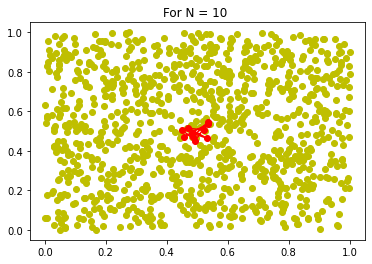

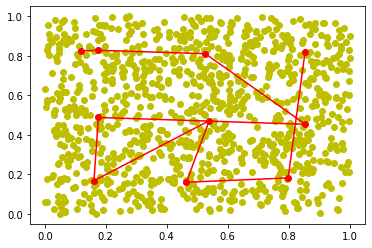

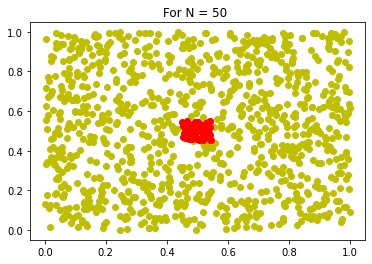

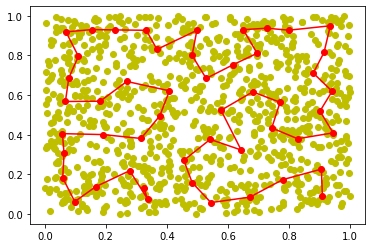

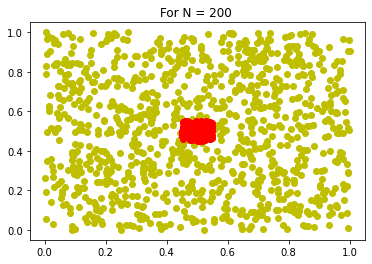

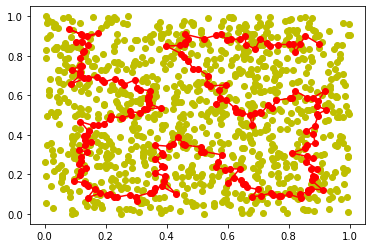

In [ ]:
SOM(10)
SOM(50)
SOM(200)

Increasing the number of points N in representation space leads to a shorter distance between the points. This is due to them being more crowded and the line segment not crossing large distances. This leads to a more wriggly line.

## 2.c)

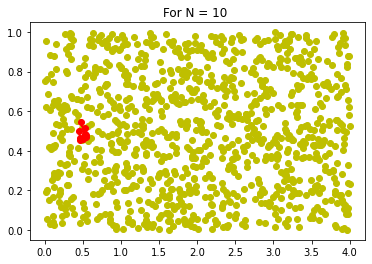

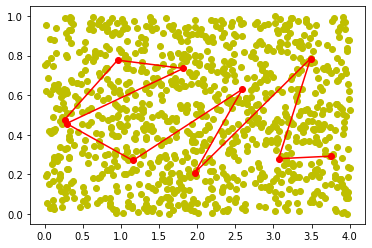

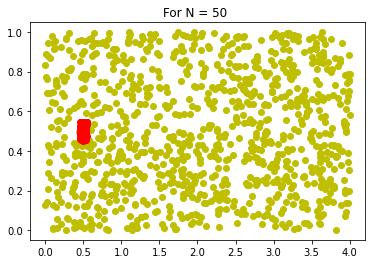

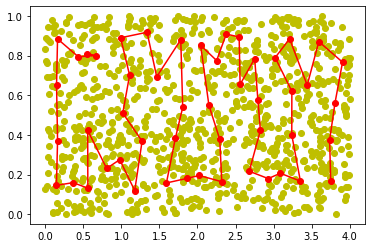

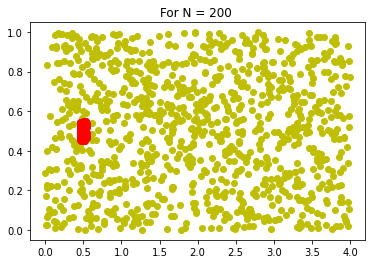

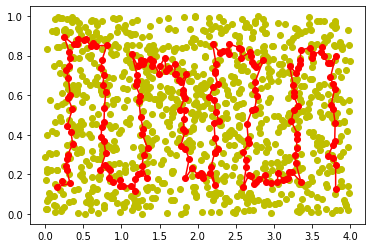

In [ ]:
number_of_inputs=1000

# Size of feature space
upper_bound_xx=1
lower_bound_xx=0
upper_bound_xy=4
lower_bound_xy=0
upper_bound_m = 0.45
lower_bound_m = 0.55

T=30

N=10
SOM(N , number_of_inputs, upper_bound_xx, lower_bound_xx, 
    upper_bound_xy, lower_bound_xy, upper_bound_m, lower_bound_m, T)
N=50
SOM(N , number_of_inputs, upper_bound_xx, lower_bound_xx, 
    upper_bound_xy, lower_bound_xy, upper_bound_m, lower_bound_m, T)
N=200
SOM(N , number_of_inputs, upper_bound_xx, lower_bound_xx, 
    upper_bound_xy, lower_bound_xy, upper_bound_m, lower_bound_m, T)

The line has a zig zag shape. This is different form when the feature space is 1x1m then the line has a more round shape. 

## 2.d)

## 2.d.1) 
Three ways to quantify correlation between gradients in feature values:
- Calculate the gradient vector at every pixel of each fucntional map
- Assign all pixels in the gradient map a value between 1 and 10, corresponding to the percentile of the gradient value compared to all gradient values of the map. 
- Calculate pixel-by-pixel intersection angles between the retinotopc gradient and gradients of other maps. 

## 2.d.2) 
The ferret visual cortex has a pronounced anisotropy of the retinotopic
map. The dimension reduction model predicts that this impacts the layout of other functional maps. So to test the validity of the dimension reduction model, the ferret visual cortex is used. 

## 2.d.3) 
In the results section, Yu et al. is stating that they found the following: Prediction gradient relationships between orientation, occular dominance and spatial frequency maps: 'These gradient correlations among maps of orientation, ocular dominance, and spatial frequency also held when the initial retinotopic map was isotropic.' 

After reading this section it seems that the authors do not agree that the correlation in gradients between orientation and occular dominance is low. On the contrary, they seem to claim that it is particularly strong in ferrets.

Furthermore on page 9 of the paper, the authors state: 'we found a strong, negative correlation between the mean orientation gradient and the occular dominance gradient.', which we again interpret as a strong correlation between the relevant gradients.

Furthermore the following sentences are quoted from the paper:

"The retino topic map and the V1/V2 border often have a specific
relationship with one another, so it can be difficult to distinguish between the influences of these two factors on the layouts of feature maps."

"Local distortions can exist in the retinotopic map that cannot be detected by in-trinsic-signal optical imaging or electrophysiological methods."

All in all we wonder whether this question was a bit misleading, as it seems that the authors do not agree with the statement that the correlations between the gradients is low. 

## 2.d.4)
We had thought about the following critcisms:

* Small amount of animals used (N = 4, N = 8).

* Animal genealogy or strain not mentioned.

* Implicit assumptions used in papers were tested on monkeys whilst in their paper ferrets are used. Multpile times in the paper they refer to animal studies that use different animals that they use and assume that these results transfer to ferrets.

* They used or compared their results to a paper that studied the boundary with a different region of the brain and the region that is of interest for this paper. So results obained from two different regions were compared.

* Inconsistencies in reporting results and results not clearly presented.